<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Carga-de-datos-y-data-cleaning" data-toc-modified-id="Carga-de-datos-y-data-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de datos y <em>data cleaning</em></a></span></li><li><span><a href="#Anatomía-de-una-gráfica" data-toc-modified-id="Anatomía-de-una-gráfica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Anatomía de una gráfica</a></span></li><li><span><a href="#Tipos-de-gráficos" data-toc-modified-id="Tipos-de-gráficos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tipos de gráficos</a></span><ul class="toc-item"><li><span><a href="#Histograma" data-toc-modified-id="Histograma-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histograma</a></span></li><li><span><a href="#Pie-Chart" data-toc-modified-id="Pie-Chart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pie Chart</a></span></li><li><span><a href="#Lineplot" data-toc-modified-id="Lineplot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lineplot</a></span></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Barplot" data-toc-modified-id="Barplot-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#joinplot" data-toc-modified-id="joinplot-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span><code>joinplot</code></a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Boxplot</a></span></li></ul></li></ul></div>

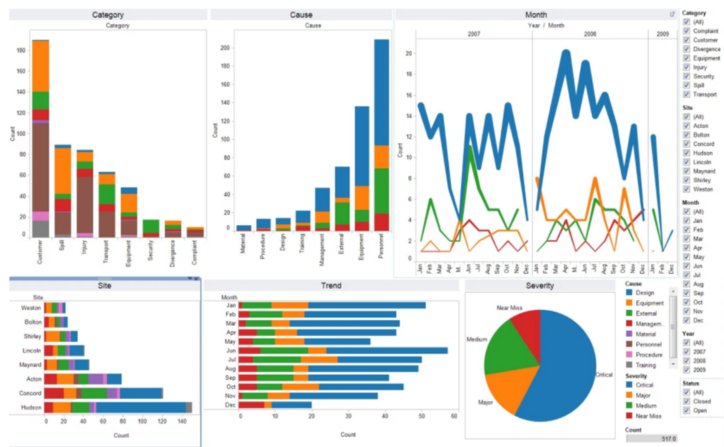

# Introducción

En la clase de hoy aprenderemos como hacer visualizaciones en Python. Para ello usaremos las principales librerías que tenemos: 

- matplotlib

- seaborn

- plotly express


El objetivo de hoy, hacer un EDA visual de nuestros datos para "entender" que es lo que está pasando. ¿Tenemos algún patrón en nuestros datos? 


Pero antes de ponernos manos a la obra... ¿Qué es EDA?

Si queremos explicar el EDA (acrónimo de *Exploratory Data Analysis*) en términos sencillos, significa que hay que tratar de entender mucho mejor los datos dados, para poder darles algún sentido.

> Dicho de otra forma, es un enfoque de análisis de conjuntos de datos para resumir sus características principales, a menudo con métodos visuales. 

EDA en Python utiliza la visualización de datos para extraer patrones y conocimientos significativos. También implica la preparación de conjuntos de datos para el análisis mediante la eliminación de irregularidades en los datos.

Basándose en los resultados de EDA, las empresas también toman decisiones de negocio, que pueden tener repercusiones posteriores.

❌ **Si el EDA no se realiza correctamente, puede obstaculizar los pasos posteriores en el proceso de creación de modelos de aprendizaje automático.**

✅ **Si se hace bien, puede mejorar la eficacia de todo lo que hagamos después.**

A lo largo de este jupyter realizaremos: 


- Limpieza de datos
- Análisis univariante
- Análisis bivariante
- Análisis multivariante




In [1]:
# primero importamos las librerías que vamos a necesitar

import pandas as pd
import numpy as np

# estas son pa pintar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# para el tiempo
import datetime

# Carga de datos y *data cleaning*


Dentro de la limpieza de datos podemos incluir: 

- Buscar valores faltantes y gestionarlos

- Columnas que no están en el formato correcto

- Nombres de las columnas


In [2]:
df = pd.read_csv("datos/retail_limpio.csv", index_col = 0)

df.head(2)

customerid  invoiceno                 invoicedate stockcode  \
0       12726     575880  2011-11-11 13:35:00.000000     21123   
1       14083     536945  2010-12-03 12:24:00.000000    17107D   

                           description  quantity  unitprice  revenue  \
0  SET/10 IVORY POLKADOT PARTY CANDLES        28       1.25    30.00   
1         FLOWER FAIRY 5 DRAWER LINERS         7       2.55     7.65   

          country    nullid  desciption_cambiada       fecha  \
0          France  198017.0                    2  2011-11-11   
1  United Kingdom  198017.0                    2  2010-12-03   

                coordenadas  precio_total  
0    (46.603354, 1.8883335)         35.00  
1  (54.7023545, -3.2765753)         17.85

In [3]:
# chequeamos los tipos de datos que tenemos

df.dtypes

customerid               int64
invoiceno                int64
invoicedate             object
stockcode               object
description             object
quantity                 int64
unitprice              float64
revenue                float64
country                 object
nullid                 float64
desciption_cambiada      int64
fecha                   object
coordenadas             object
precio_total           float64
dtype: object

In [4]:
# antes de convertir a datetime

df["fecha"][0]

'2011-11-11'

In [5]:
# cambiamos el formato de la columna fecha

df['fecha'] = df['fecha'].apply(pd.to_datetime)

In [6]:
# después de convertir a datetime

df["fecha"][0]

Timestamp('2011-11-11 00:00:00')

In [7]:
# volvemos a chequear los tipos de las columnas

df.dtypes

customerid                      int64
invoiceno                       int64
invoicedate                    object
stockcode                      object
description                    object
quantity                        int64
unitprice                     float64
revenue                       float64
country                        object
nullid                        float64
desciption_cambiada             int64
fecha                  datetime64[ns]
coordenadas                    object
precio_total                  float64
dtype: object

In [8]:
df['invoicedate'].apply(pd.to_datetime).head()

0   2011-11-11 13:35:00
1   2010-12-03 12:24:00
2   2011-12-07 15:07:00
3   2011-11-03 13:01:00
4   2011-02-10 13:34:00
Name: invoicedate, dtype: datetime64[ns]

# Anatomía de una gráfica

Matplotlib es una librería de ploteo en 2-D que ayuda a visualizar figuras. 


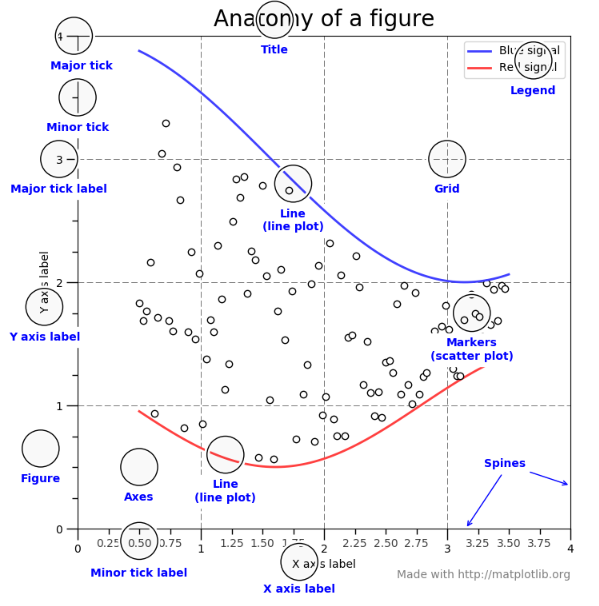




# Tipos de gráficos

## Histograma

Un histograma toma una serie de datos y los divide en una serie de intervalos ( o *bins*). A continuación, traza la frecuencia de los puntos de datos en cada intervalo (es decir, el intervalo de puntos). Es útil para entender el recuento de los rangos de datos.


**Cuándo utilizarlo**: Debemos utilizar el histograma cuando necesitemos el recuento de la variable en un gráfico.

1️⃣ **`MATPLOTLIB`** --> método `plt.hist`

In [9]:
df["revenue"].head()

0    30.00
1     7.65
2     4.68
3    20.80
4     2.50
Name: revenue, dtype: float64

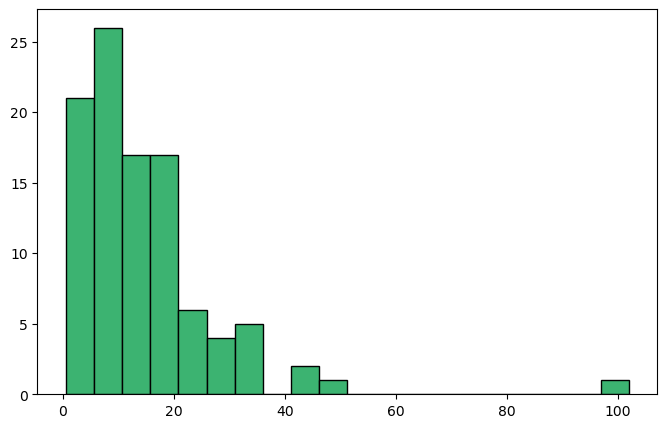

In [10]:
plt.figure(figsize = (8,5)) # para establecer el tamaño de la figura. Este tamaño solo se aplicará a esta figura 


plt.hist(df["revenue"],  # la variable 
         edgecolor = "black", # poner el color de la línea
         facecolor = "mediumseagreen", # poner el color de relleno
         bins = 20   # numero de barras
        )

plt.show();

In [11]:
# si queremos establecer el tamaño de la figura una vez y que sea igual para todas las figuras

plt.rcParams["figure.figsize"] = (10,8)

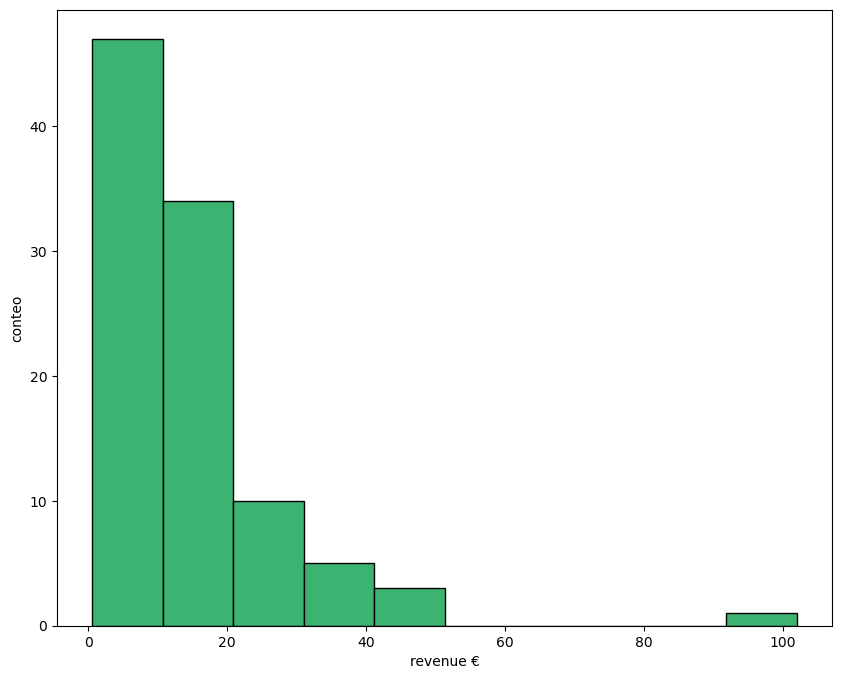

In [12]:
# pero nuestra gráfica no tiene nombres en los ejes 😔. 

plt.hist(df["revenue"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 10)

plt.xlabel("revenue €") # para poner etiqueta en el eje x
plt.ylabel("conteo") # para poner etiqueta en el eje y

plt.show();

In [13]:
df["revenue"].describe()

count    100.000000
mean      15.190400
std       13.536373
min        0.550000
25%        6.287500
50%       13.200000
75%       19.890000
max      102.000000
Name: revenue, dtype: float64

In [14]:
df["revenue"].shape

(100,)

In [15]:
#help(plt.hist)

2️⃣ **`SEABORN`** --> método `sns.displot`

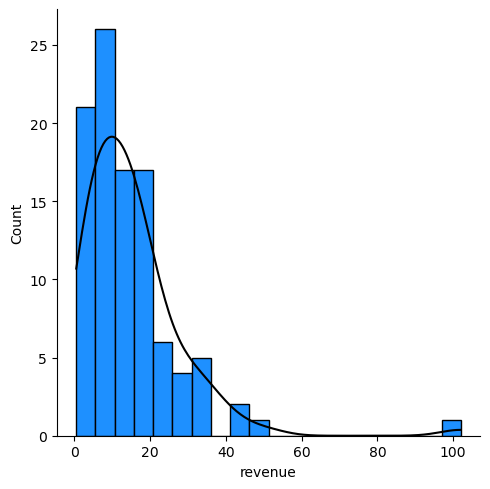

In [16]:
sns.displot(df.revenue,
            facecolor='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            color= "black" ,# para cambiar el color de la línea del kde
            kde=True); # para trazar una línea de densidad

Buenas y malas noticias! 

😃 Seaborn nos genera el nombre de los ejes automanticamente

😞 Los parámetros generales para el tamaño que establecimos no se aplican a las figuras de seaborn. 

Veamos como se cambia el tamaño! 

En el caso del `displot` como `lmplot`, `catplot`, `factorplot`, `jointplot` tienen unos parámetros específicos para cambiar el tamaño de la figura. Estos son: 

- `height`: altura (en pulgadas) de cada plot.


- `aspect`: relación de aspecto de cada plot, de modo que aspecto * altura da el ancho de cada plot en pulgadas.


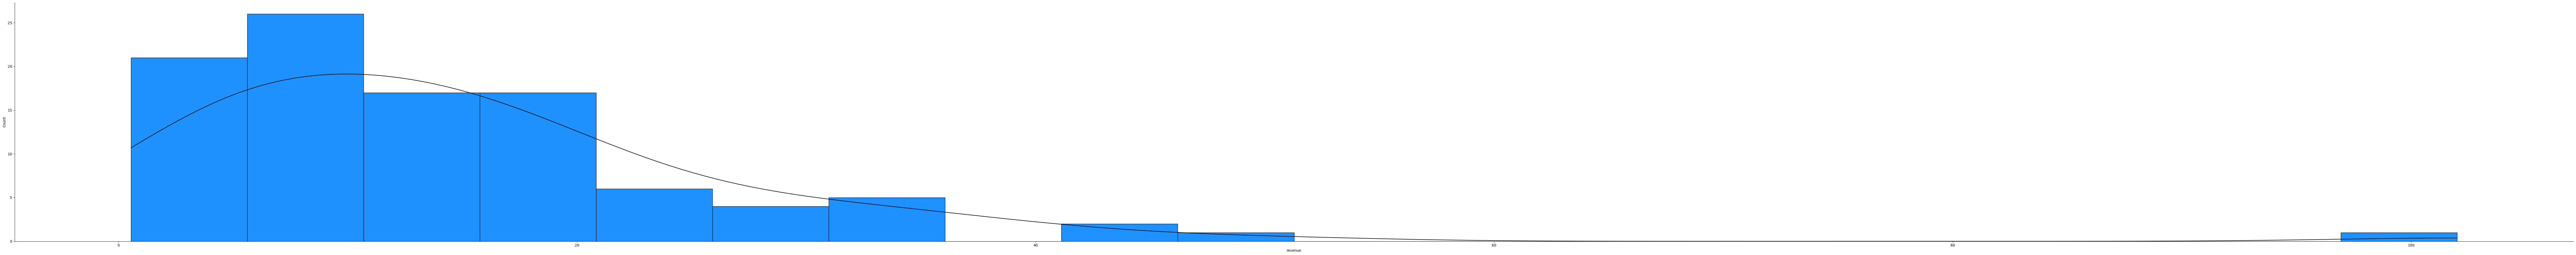

In [17]:
# cambiamos el tamaño de la imagen
sns.displot(df.revenue,
            facecolor ='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            kde=True, 
            color = "black",
            height = 10, # establecer la altura de la gráfica
            aspect = 10); # establecer la relación del aspecto

Otras formas de cambiar el tamaño de una figura en seaborn [aquí](https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/)

3️⃣ **`PLOTLY`** --> método `sns.displot`

In [18]:
fig1 = px.histogram(df, 
                    x="revenue", 
                    nbins = 20, 
                    width=900, # establecer la anchura
                    height=600) # establecer la altura

fig1.update_layout(title='Revenue') # poner título al gráfico

fig1.update_traces(marker=dict(color='grey')) # establecer el color de las barras

fig1.show()

In [19]:
df.head()

customerid  invoiceno                 invoicedate stockcode  \
0       12726     575880  2011-11-11 13:35:00.000000     21123   
1       14083     536945  2010-12-03 12:24:00.000000    17107D   
2       17870     581173  2011-12-07 15:07:00.000000    51014A   
3       16347     574249  2011-11-03 13:01:00.000000     23203   
4       15570     543602  2011-02-10 13:34:00.000000     22976   

                           description  quantity  unitprice  revenue  \
0  SET/10 IVORY POLKADOT PARTY CANDLES        28       1.25    30.00   
1         FLOWER FAIRY 5 DRAWER LINERS         7       2.55     7.65   
2                 FEATHER PEN,HOT PINK        16       0.39     4.68   
3            JUMBO BAG DOILEY PATTERNS        14       2.08    20.80   
4     CIRCUS PARADE CHILDRENS EGG CUP          6       1.25     2.50   

          country    nullid  desciption_cambiada      fecha  \
0          France  198017.0                    2 2011-11-11   
1  United Kingdom  198017.0                    2 2010-12-03   
2  United Kingdom  186653.0                    2 2011-12-07   
3  United Kingdom  198017.0                    2 2011-11-03   
4  United Kingdom  189829.0                    2 2011-02-10   

                coordenadas  precio_total  
0    (46.603354, 1.8883335)         35.00  
1  (54.7023545, -3.2765753)         17.85  
2  (54.7023545, -3.2765753)          6.24  
3  (54.7023545, -3.2765753)         29.12  
4  (54.7023545, -3.2765753)          7.50

In [20]:
# en plotly si que podemos pasarle dos parámtros, al histograma. Pero en este caso será un countplot

fig2 = px.histogram(df, 
                    x = "fecha", 
                    y = "revenue", 
                    nbins = 20)

fig2.show()

## Pie Chart 

Es un gráfico circular que se divide en rebanadas para ilustrar la proporción numérica. Cada porción de un gráfico circular sirve para mostrar la proporción de las partes de un todo.


**Cuándo utilizarlo**: El gráfico circular se suele usar en pocas ocasiones, ya que puede resultar difícil comparar las secciones del gráfico. En su lugar, se utiliza el diagrama de barras, ya que es fácil comparar las secciones.

In [21]:
df.head(2)

customerid  invoiceno                 invoicedate stockcode  \
0       12726     575880  2011-11-11 13:35:00.000000     21123   
1       14083     536945  2010-12-03 12:24:00.000000    17107D   

                           description  quantity  unitprice  revenue  \
0  SET/10 IVORY POLKADOT PARTY CANDLES        28       1.25    30.00   
1         FLOWER FAIRY 5 DRAWER LINERS         7       2.55     7.65   

          country    nullid  desciption_cambiada      fecha  \
0          France  198017.0                    2 2011-11-11   
1  United Kingdom  198017.0                    2 2010-12-03   

                coordenadas  precio_total  
0    (46.603354, 1.8883335)         35.00  
1  (54.7023545, -3.2765753)         17.85

En este caso vamos a querer plotear la media de dinero gastado por paises. 

1️⃣ **`MATPLOTLIB`** --> método `plt.pie`

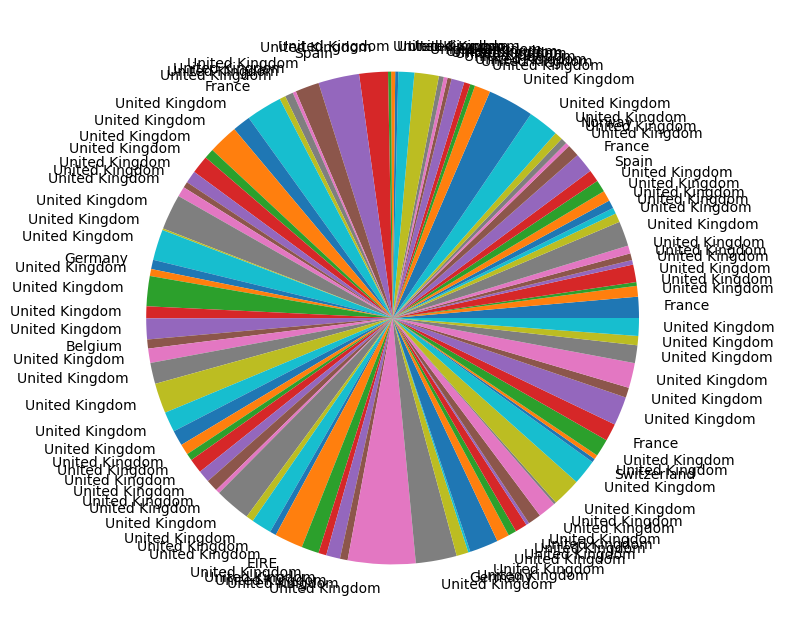

In [22]:
# veamos que pasa si hacemos un plot de este tipo básico

plt.pie(df['precio_total'], 
       labels = df["country"]);

Oh oh... tenemos un problema, aquí no hay quien entienda nada. ¿Se os ocurre algo? 

In [23]:
# la solución es hacer un groupby por pais. 

df_pie = pd.DataFrame(df.groupby(['country'])
                      ["precio_total"].mean()).reset_index()

df_pie.head()

country  precio_total
0  Belgium        15.000
1     EIRE        47.100
2   France        39.205
3  Germany        17.600
4   Norway        10.080

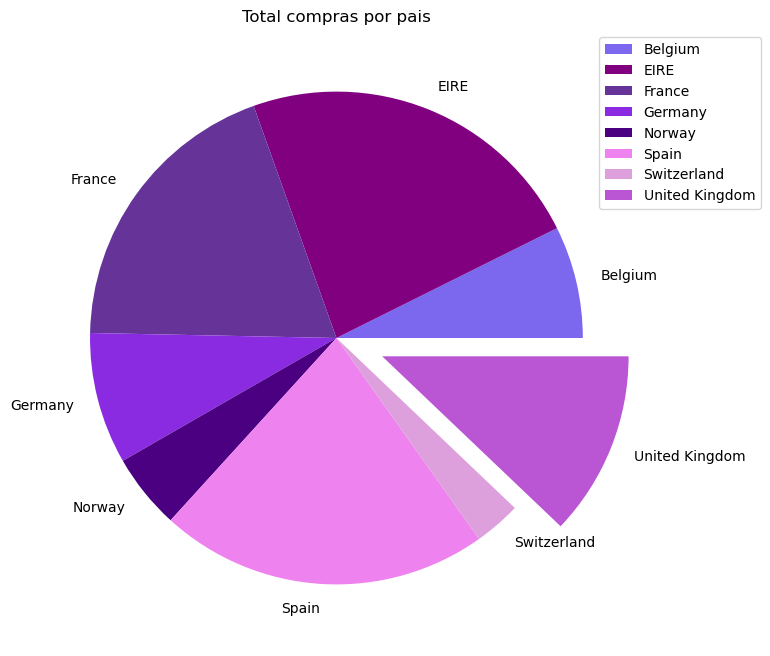

In [24]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet'
          ,'indigo', 'violet', 'plum', 'mediumorchid'] # para establecer los colores

explode = (0, 0. ,0., 0, 0, 0., 0, 0.2) # para sacar los quesitos hacia fuera


plt.pie(df_pie['precio_total'], 
       labels = df_pie["country"], 
       colors = colors, # para cambiar el color de la gráfica
        explode = explode)  # para sacar los quesitos hacia fuera


plt.title("Total compras por pais") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

⚠️ **En seaborn no tenemos este tipo de gráfico**

2️⃣ **`PLOTLY`** --> método `px.pie`

In [25]:
# con plotly express

fig5 = px.pie(df_pie, 
              values='precio_total', 
              names='country', 
             title='Total precio por pais', # poner el título de la figura
             color_discrete_sequence = px.colors.sequential.haline # para elegir la escala de colores
             )
fig5.show()

## Lineplot

Es útil para entender la tendencia en el tiempo. También nos puede auydar a entender correlación entre variables. Una tendencia ascendente significa una correlación positiva y una tendencia descendente significa una correlación negativa. Se utiliza sobre todo en modelos de previsión y seguimiento.


**Cuándo utilizarla**: Las series de tiempo deben ser utilizadas cuando una o múltiples variables deben ser trazadas en el tiempo.


Para hacer este tipo de gráficos con la fecha tenemos que hacer unos cambios antes:

In [26]:
df['fecha'].dt.year.unique()

array([2011, 2010])

In [27]:
# hacemos un groupby por año y mes para calcular la media del precio total

df_line = pd.DataFrame(df.groupby([df['fecha'].dt.year, 
                                   df['fecha'].dt.month])["precio_total"].mean())


In [28]:
df_line

precio_total
fecha fecha              
2010  12        14.831667
2011  1         16.840000
      2         28.612500
      3         31.070000
      4         27.061111
      5         22.180000
      6         21.978333
      7         27.026364
      8         31.164000
      9         21.715556
      10        17.599231
      11        33.326111
      12        35.915000

In [29]:
df_line = df_line.loc[2011].reset_index()

In [30]:
df_line.head()

fecha  precio_total
0      1     16.840000
1      2     28.612500
2      3     31.070000
3      4     27.061111
4      5     22.180000

1️⃣**`MATPLOTLIB`** --> método `plt.plot`

In [31]:
datetime.date(2000, 4, 1).strftime('%B')

'April'

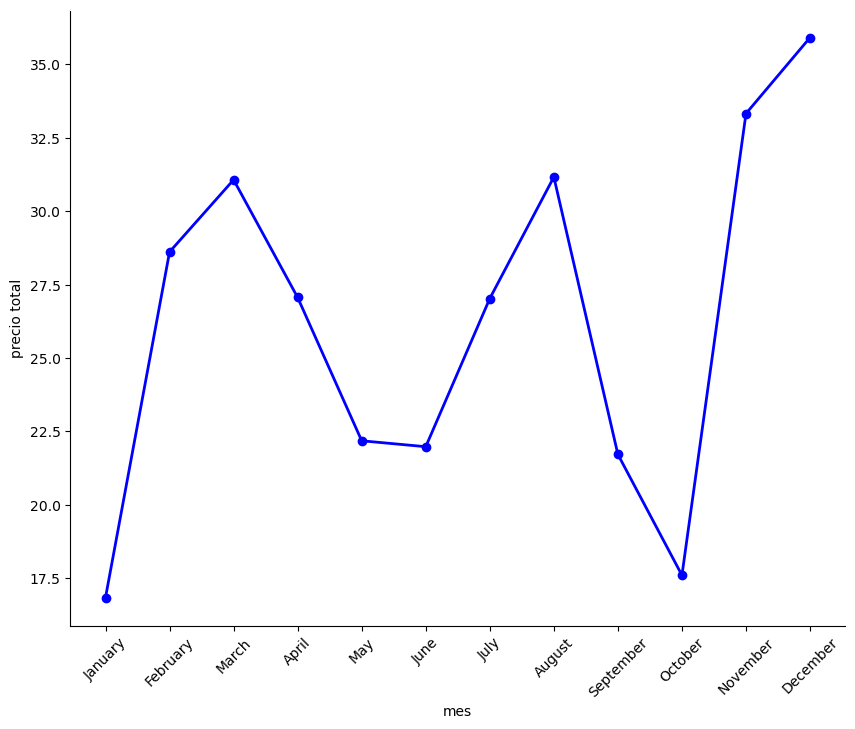

In [32]:
ax = plt.axes() # para poder cambiar el estilo de los ejes

ax.set_facecolor("white") # poner el fondo en blanco

ax.spines['bottom'].set_color('black') # color del eje x
ax.spines['top'].set_color('white') # color del eje de arriba
ax.spines['right'].set_color('white') # color del eje de la derecha
ax.spines['left'].set_color('black') # color del eje y

plt.plot(df_line["fecha"],        # eje x
         df_line["precio_total"], # eje y
         color = "blue", # para cambiar el color de la línea
         linewidth = 2, # para cambiar el grosor de la línea
         marker = "o") # para poner los marcadores en nuestra línea

meses = [datetime.date(2000, m, 1).strftime('%B') for m in range(1, 13)] # lista con los nombres de los meses para ponerlos en el eje x



plt.xlabel("mes") # para poner etiqueta en el eje x
plt.ylabel("precio total") # para poner etiqueta en el eje y
plt.xticks(df_line["fecha"], meses, rotation=45) # modificar los nombres del eje X


plt.show();


2️⃣ **`SEABORN`** --> método `sns.lineplot`

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/3930452149.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



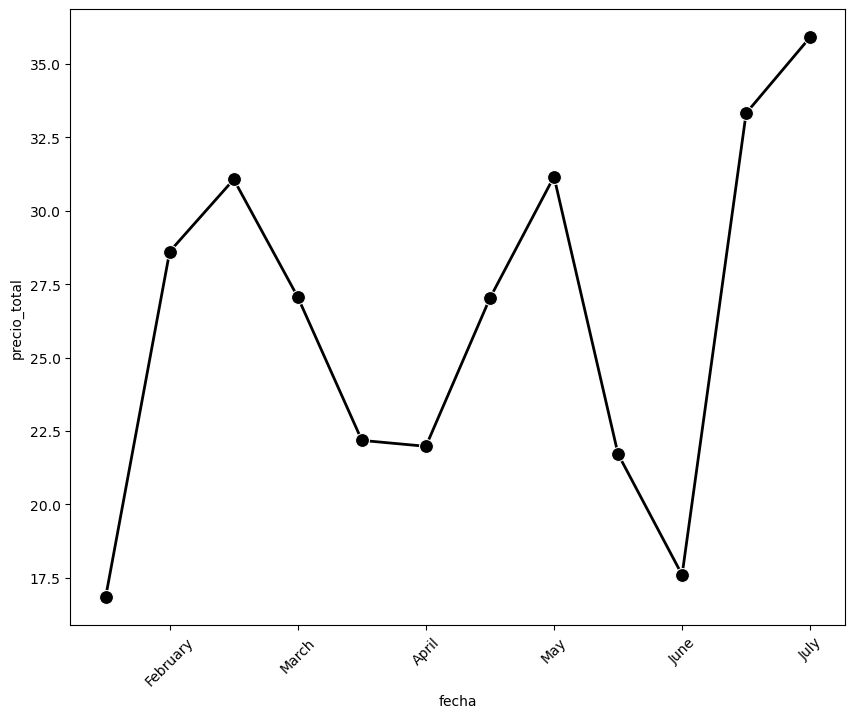

In [33]:
fig2 = sns.lineplot(data=df_line, 
                    x="fecha", 
                    y="precio_total",
                    color = "black",
                    marker = "o",
                    markersize = 10, # para cambiar el tamaño del marcador
                    linewidth = 2); # anchura de la línea

fig2.set_xticklabels(meses, # lista con las etiquetas
                     rotation = 45) # inclinación de los ejes
                     

plt.show();

3️⃣ **`PLOTLY`** --> método `px.line`

In [34]:
df_line.head()

fecha  precio_total
0      1     16.840000
1      2     28.612500
2      3     31.070000
3      4     27.061111
4      5     22.180000

In [35]:
fig20 = px.line(df_line, 
                x="fecha",       # nombres de columnas del dataframe
                y="precio_total", 
               labels={'fecha': "meses", # para cambiar el nombre de los ejes en el grafico
                        'precio_total': "precio (€)"}, 
              title='evolucion en el tiempo precio')



fig20.update_traces(mode='markers+lines', # para poner los marcadores
                  line=dict(color="red", # para cambiar el color 
                    width=0.5)) # para cambiar la grosor de la línea


fig20.update_xaxes(showline=True, # mostrar el eje x
                  linewidth=0.5,
                  linecolor='black', 
                  ticks="outside", # configurar las "marcas" de los ejes
                  tickcolor='black', 
                  tickangle = -45)

fig20.update_yaxes(showline=True, # mostrar eje y
                 linewidth=0.5, 
                 linecolor='black', 
                 ticks="outside", # configurar las "marcas" de los ejes
                 tickcolor='black')


fig20.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)' },# quitar el color gris del fondo 
                  xaxis = dict( # para cambiar el nombre de las etiquetas del eje x
                    tickmode = 'array',
                    tickvals = list(range(1,13)), # los valores actuales del eje x
                    ticktext = meses # los valores que quiero poner
    )) 


fig20.show()

In [36]:
#help(fig20.update_traces)

## Scatterplot

El gráfico de dispersión ayuda a visualizar dos variables numéricas. Ayuda a identificar la relación de los datos con cada variable, es decir, la correlación o los patrones de tendencia. También ayuda a detectar los valores atípicos en el gráfico.

**Cuándo utilizarlo**: Se utiliza en conceptos de aprendizaje automático como la regresión, donde x e y son variables continuas. También se utiliza en la agrupación de dispersiones o en la detección de valores atípicos.



In [37]:
df.head(2)

customerid  invoiceno                 invoicedate stockcode  \
0       12726     575880  2011-11-11 13:35:00.000000     21123   
1       14083     536945  2010-12-03 12:24:00.000000    17107D   

                           description  quantity  unitprice  revenue  \
0  SET/10 IVORY POLKADOT PARTY CANDLES        28       1.25    30.00   
1         FLOWER FAIRY 5 DRAWER LINERS         7       2.55     7.65   

          country    nullid  desciption_cambiada      fecha  \
0          France  198017.0                    2 2011-11-11   
1  United Kingdom  198017.0                    2 2010-12-03   

                coordenadas  precio_total  
0    (46.603354, 1.8883335)         35.00  
1  (54.7023545, -3.2765753)         17.85

1️⃣ **`MATPLOTLIB`** --> método `plt.scatter`

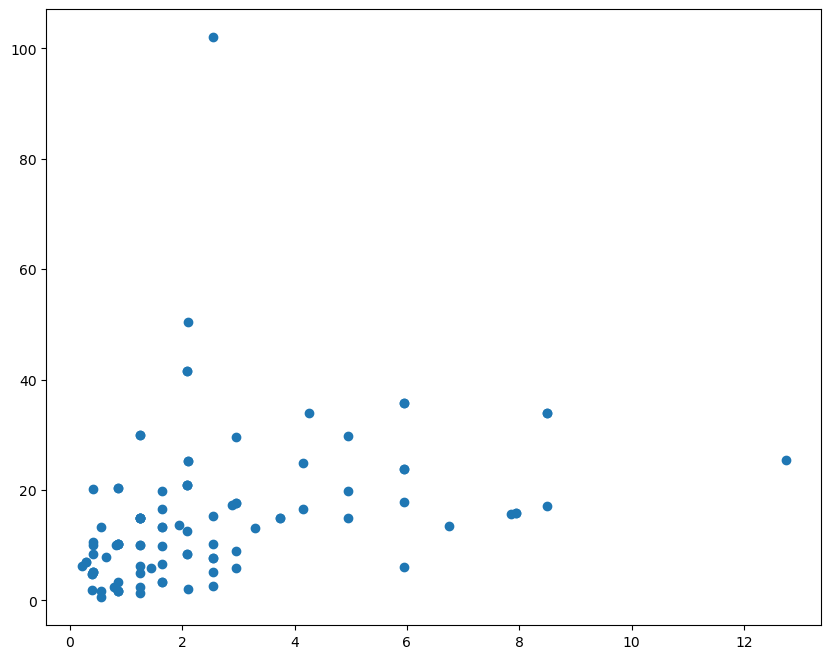

In [38]:
plt.scatter(df['unitprice'],   # x
            df['revenue'])     # y

plt.show();

2️⃣ **`SEABORN`** --> método `sns.scatterplot`

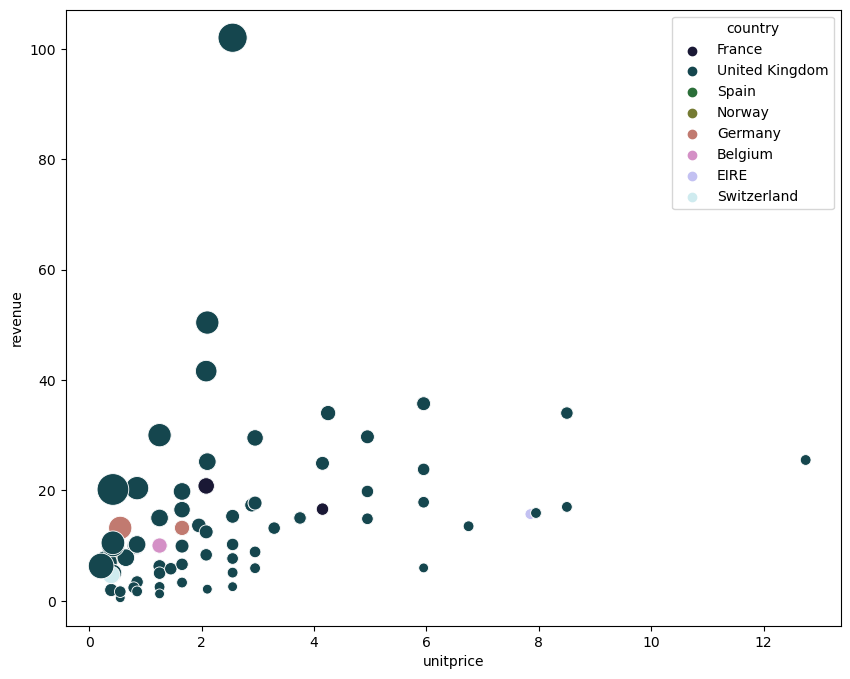

In [39]:
sns.scatterplot(x='unitprice', 
                y='revenue', 
                data = df ,
                hue = 'country', # puntos de distintos colores en función de la variable que indiquemos
                s = df.quantity*10, # tamaño de los marcadores
               palette = "cubehelix") # establecer el color de los puntos

plt.show(); 


In [40]:
df[df.revenue==df.revenue.max()]

customerid  invoiceno                 invoicedate stockcode  \
76       14251     579391  2011-11-29 12:07:00.000000     22910   

                          description  quantity  unitprice  revenue  \
76  PAPER CHAIN KIT VINTAGE CHRISTMAS        44       2.55    102.0   

           country    nullid  desciption_cambiada      fecha  \
76  United Kingdom  198017.0                    2 2011-11-29   

                 coordenadas  precio_total  
76  (54.7023545, -3.2765753)         112.2

3️⃣ **`PLOTLY`** --> método `px.scatter`

In [41]:
fig10 = px.scatter(df, 
                   x= 'unitprice', 
                   y= 'revenue', 
                  color = 'country') # es como el hue del scatterplot

# para cambiar la leyenda interactiva
#fig10.update_traces(hovertemplate='Product/country=%{unitprice}<br>revenue=%{revenue}<extra></extra>')
    
fig10.show()

## Heatmap 

Normalmente vamos a usar un `heatmap` para representar visualmente la correlación entre todas nuestras variables

In [42]:
# seleccionamos todas las filas y todas las columnas menos "descripcion_cambiada"

df = df.loc[:, df.columns != 'desciption_cambiada']

In [43]:
# la correlacion entre las variables la podemos sacar con el método corr

df.corr()

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/66020841.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



customerid  invoiceno  quantity  unitprice   revenue    nullid  \
customerid      1.000000   0.008982 -0.053896  -0.120508 -0.166138  0.058701   
invoiceno       0.008982   1.000000  0.065059  -0.018356  0.227026  0.091666   
quantity       -0.053896   0.065059  1.000000  -0.411084  0.429766  0.009546   
unitprice      -0.120508  -0.018356 -0.411084   1.000000  0.339981 -0.187670   
revenue        -0.166138   0.227026  0.429766   0.339981  1.000000 -0.105169   
nullid          0.058701   0.091666  0.009546  -0.187670 -0.105169  1.000000   
precio_total   -0.178640   0.152613  0.100771   0.742185  0.882602 -0.168764   

              precio_total  
customerid       -0.178640  
invoiceno         0.152613  
quantity          0.100771  
unitprice         0.742185  
revenue           0.882602  
nullid           -0.168764  
precio_total      1.000000

Con un `heatmap` lo veremos de una forma más amigable

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/2228982044.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



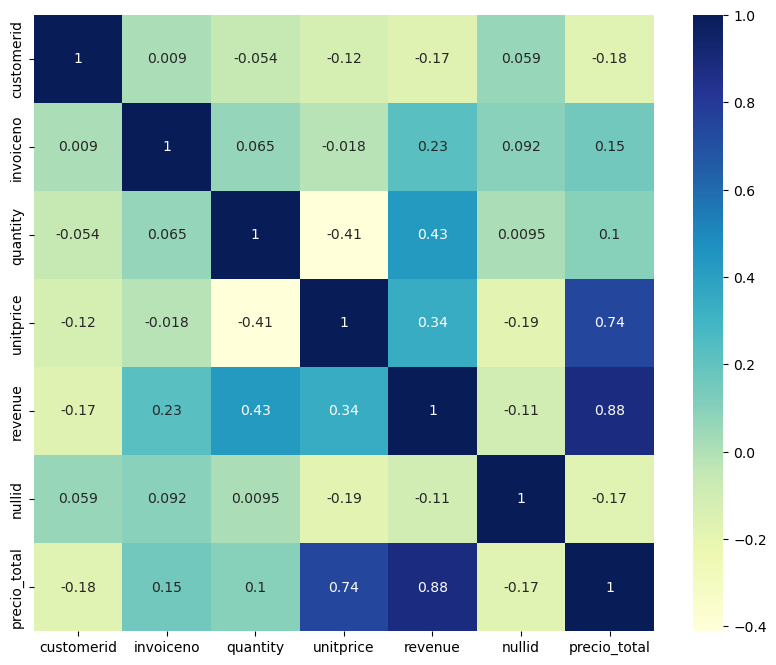

In [44]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación


Para crear solo una parte de la matriz:

In [45]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

mask

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/3351953132.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/3351953132.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_20641/1436882918.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



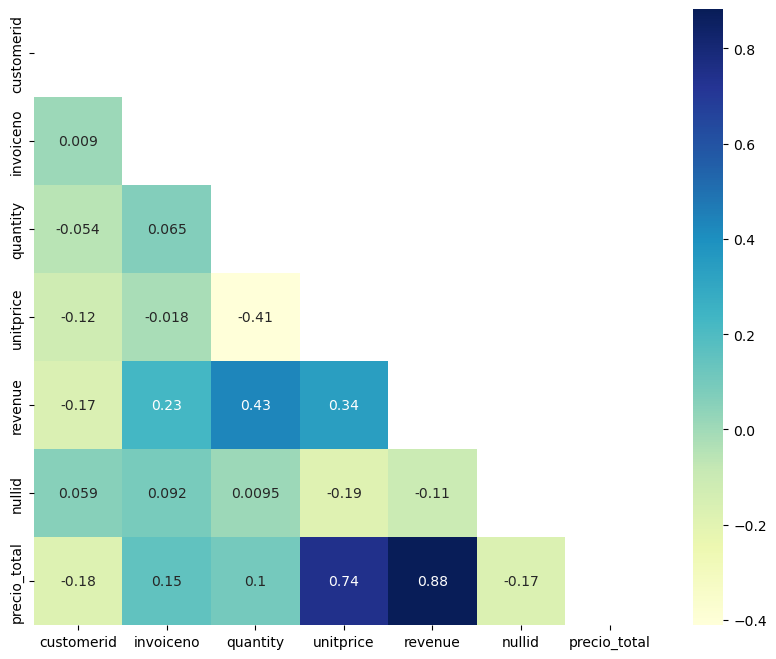

In [46]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
            mask = mask,     # mascara
           annot = True); # para sacar el valor de la correlación

## Barplot 

Se utiliza para dibujar una gráfica de barras. Un diagrama de barras representa una estimación de la tendencia central para una variable numérica con la altura de cada rectángulo y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

In [47]:
df.head(2)

customerid  invoiceno                 invoicedate stockcode  \
0       12726     575880  2011-11-11 13:35:00.000000     21123   
1       14083     536945  2010-12-03 12:24:00.000000    17107D   

                           description  quantity  unitprice  revenue  \
0  SET/10 IVORY POLKADOT PARTY CANDLES        28       1.25    30.00   
1         FLOWER FAIRY 5 DRAWER LINERS         7       2.55     7.65   

          country    nullid      fecha               coordenadas  precio_total  
0          France  198017.0 2011-11-11    (46.603354, 1.8883335)         35.00  
1  United Kingdom  198017.0 2010-12-03  (54.7023545, -3.2765753)         17.85

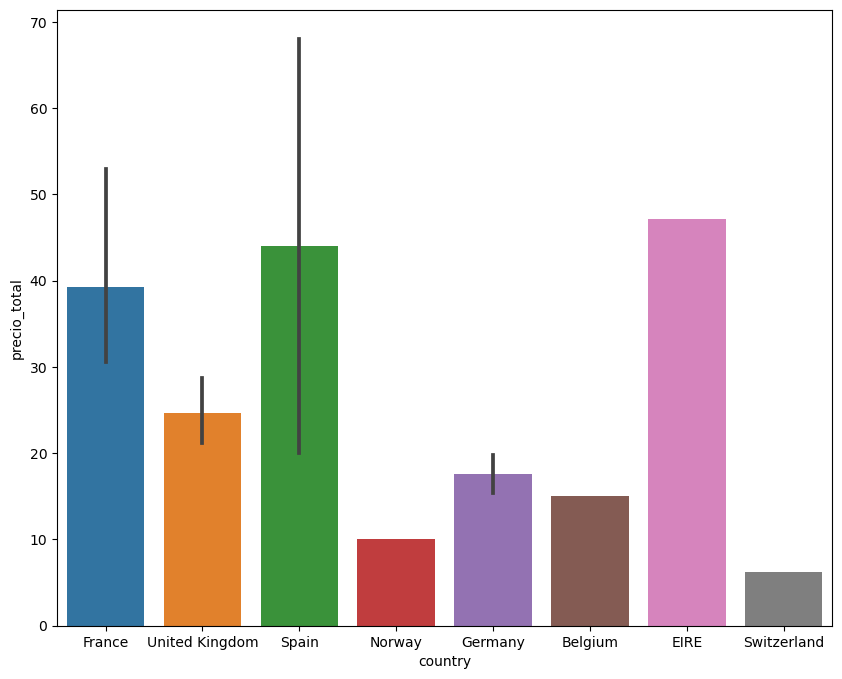

In [48]:
# creamos el barplot

sns.barplot(x='country', 
            y='precio_total',
            data=df);


Ahora vamos a querer filtrar por los productos que más se vendem y saber cual es el precio medio gastado por nuestros clientes. 
Para hacer esto primero vamos a hacer un groupby, pero vamos a intriducir un concepto nuevo, el `filter`. 

In [49]:
def filtrado(df):
    
    x = df['description'].count()
    
    return x>=2

In [50]:
df['description'].value_counts()[:5]

PACK OF 60 PINK PAISLEY CAKE CASES    2
HOME BUILDING BLOCK WORD              2
JUMBO BAG VINTAGE LEAF                2
PLACE SETTING WHITE HEART             1
WIRE EGG BASKET                       1
Name: description, dtype: int64

In [51]:
# hacemos un groupby con filtro. Agruparemos por descripción y filtraremos por aquellos productos que más se vendan

#df_description = df.groupby('description').filter(lambda x: x['description'].count() >= 2 )

df_description = df.groupby('description').filter(filtrado)

df_description.head()

customerid  invoiceno                 invoicedate stockcode  \
48       14159     555558  2011-06-05 14:06:00.000000     21977   
58       16523     563450  2011-08-16 14:33:00.000000     23202   
67       15089     564166  2011-08-23 13:40:00.000001     21754   
86       14462     543235  2011-02-04 13:30:00.000000     21754   
87       15529     566495  2011-09-13 11:14:00.000000     21977   

                           description  quantity  unitprice  revenue  \
48  PACK OF 60 PINK PAISLEY CAKE CASES         5       0.55     0.55   
58              JUMBO BAG VINTAGE LEAF        24       2.08    41.60   
67            HOME BUILDING BLOCK WORD        10       5.95    35.70   
86            HOME BUILDING BLOCK WORD         5       5.95     5.95   
87  PACK OF 60 PINK PAISLEY CAKE CASES         7       0.55     1.65   

           country    nullid      fecha               coordenadas  \
48  United Kingdom  198017.0 2011-06-05  (54.7023545, -3.2765753)   
58  United Kingdom  198017.0 2011-08-16  (54.7023545, -3.2765753)   
67  United Kingdom    8053.0 2011-08-23  (54.7023545, -3.2765753)   
86  United Kingdom  198017.0 2011-02-04  (54.7023545, -3.2765753)   
87  United Kingdom   31437.0 2011-09-13  (54.7023545, -3.2765753)   

    precio_total  
48          2.75  
58         49.92  
67         59.50  
86         29.75  
87          3.85

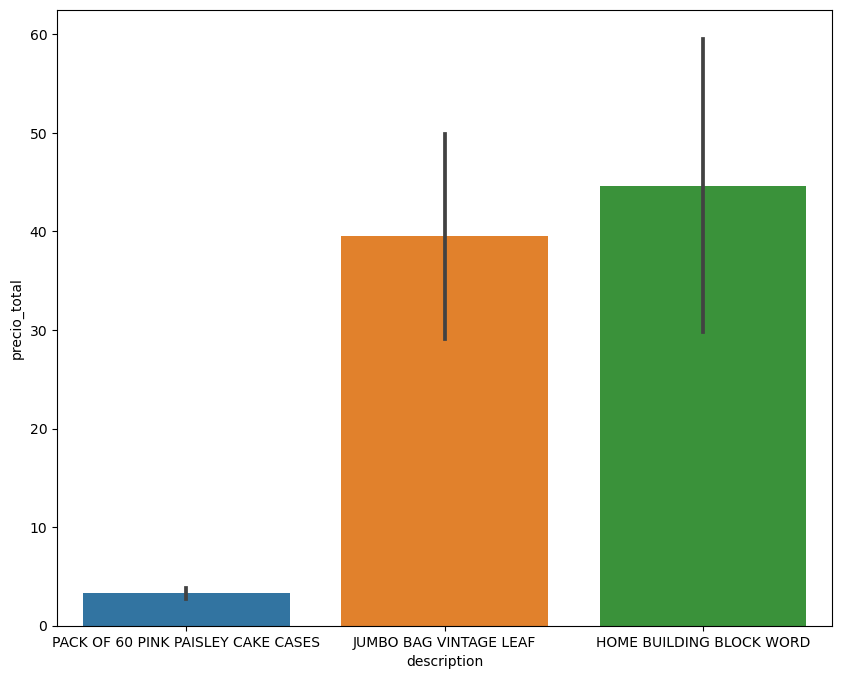

In [52]:
sns.barplot(x='description', 
            y='precio_total',
            data=df_description);


## `joinplot` 

Nos permite básicamente emparejar dos gráficos para datos bivariados. Con su elección de que parámetro kind va comparar:

- scatter


- reg


- resid


- kde


- hex

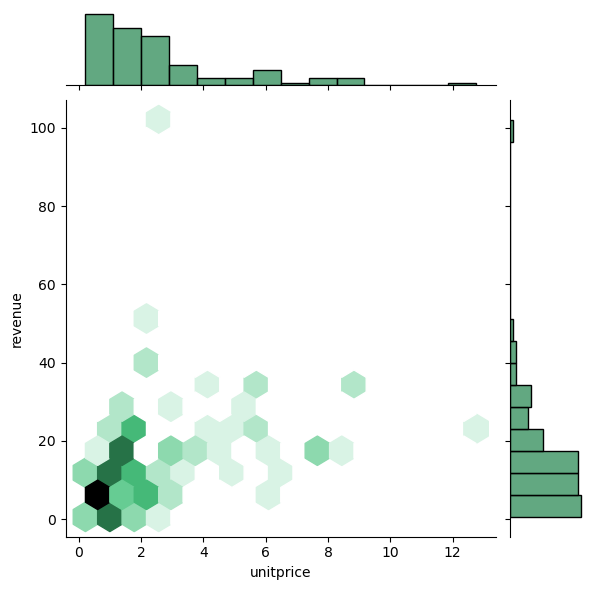

In [53]:
sns.jointplot(x=df['unitprice'],
              y=df['revenue'],
             kind = 'hex', # establecer el tipo de gráfico principal 
             color = 'seagreen' )
plt.show();

## Boxplot 

Boxplot ofrece un resumen de los datos. Ayuda a entender mejor nuestra distribución.

**Cuándo utilizarlo**: Se debe utilizar cuando requerimos utilizar la información estadística global sobre la distribución de los datos. Se puede utilizar para detectar valores atípicos en los datos.

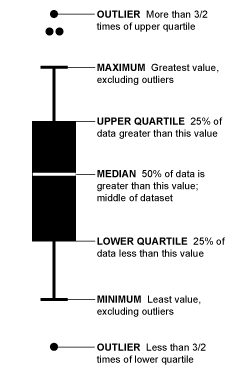

📌 En este caso solo lo vamos hacer solo para algunas columnas, en este caso: 

- unitprice

- precio_total

- quantity

🚨**Atención** vamos a introducir los subplots! 

In [54]:
df.describe().T

count         mean           std        min          25%  \
customerid    100.0   15234.0100   1735.466214   12397.00   13709.7500   
invoiceno     100.0  561097.1000  12936.599117  536401.00  550831.0000   
quantity      100.0      13.3200      8.716500       5.00       7.0000   
unitprice     100.0       2.5334      2.373831       0.21       0.8500   
revenue       100.0      15.1904     13.536373       0.55       6.2875   
nullid        100.0  195726.0200  75793.135050    3379.00  189035.0000   
precio_total  100.0      25.3240     18.994518       2.75      11.5125   

                    50%          75%        max  
customerid     15306.00   16579.2500   18245.00  
invoiceno     561446.00  572291.7500  581187.00  
quantity          10.00      16.0000      52.00  
unitprice          1.65       2.9500      12.75  
revenue           13.20      19.8900     102.00  
nullid        198017.00  198017.0000  392091.00  
precio_total      20.00      33.8625     112.20

1️⃣ **`MATPLOTLIB`** --> método `plt.boxplot`

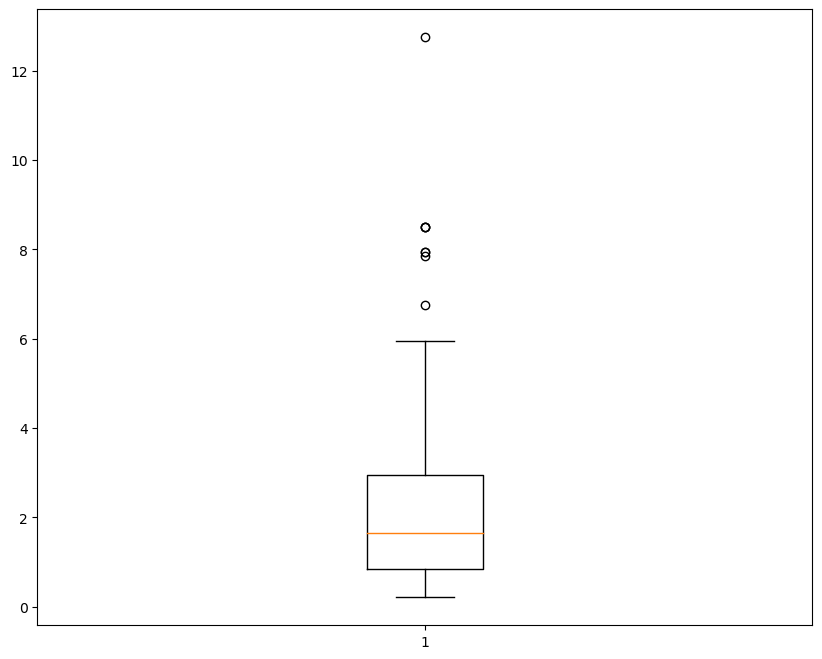

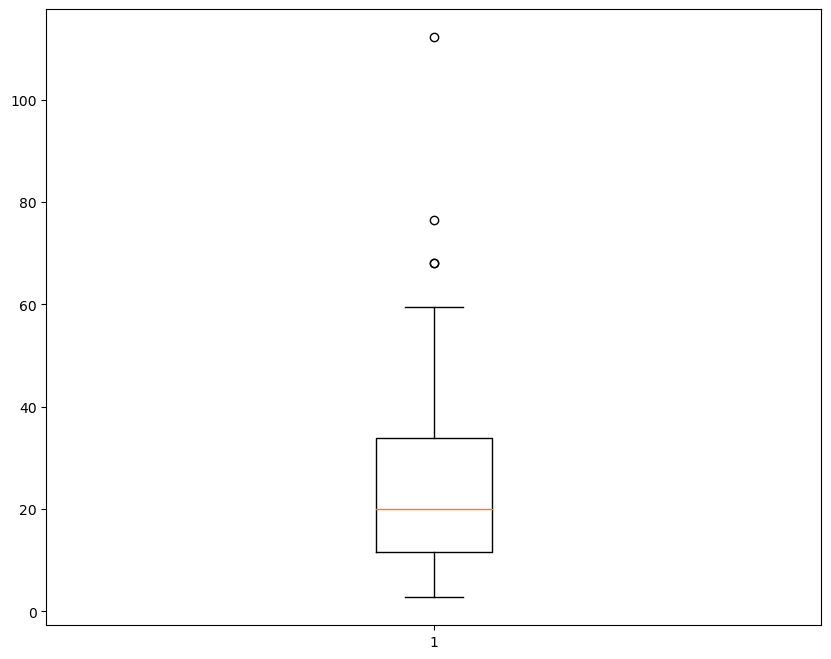

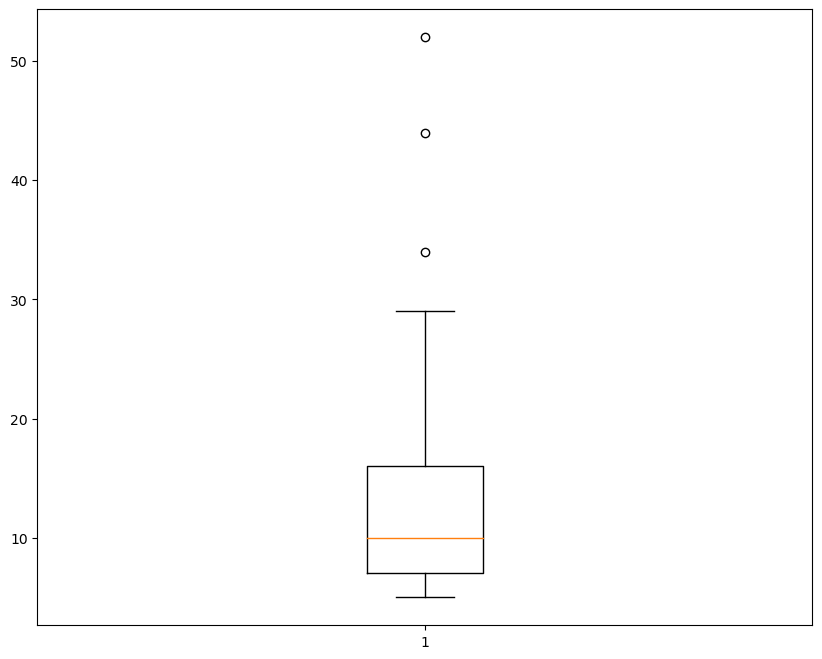

In [55]:
# primero hacemos una lista con los nombres de las columnas que nos interesan
columnas = ["unitprice", "precio_total", "quantity"]

for col in columnas: 
    plt.boxplot(df[col])
    plt.show()

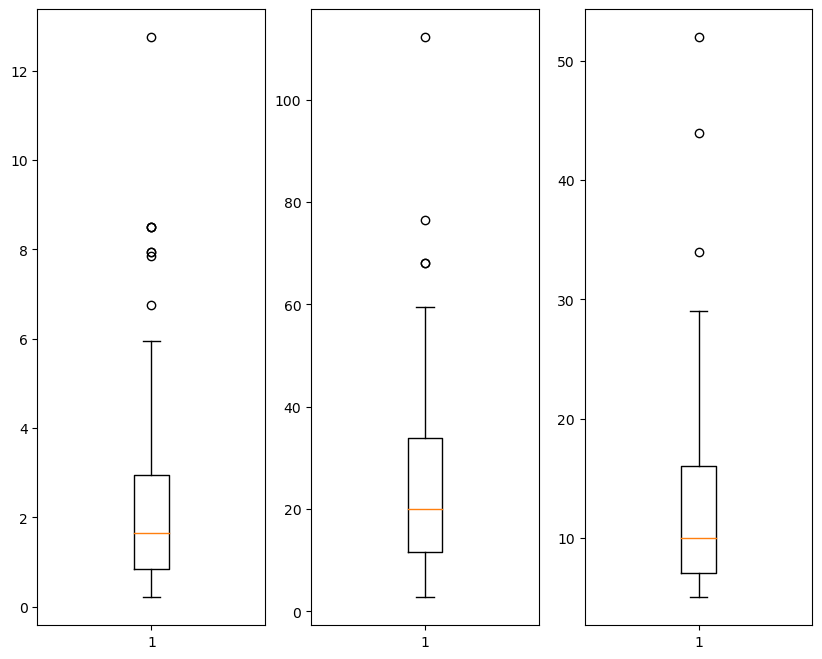

In [56]:
fig, ax = plt.subplots(1, 3) # establecemos el número de filas y columnas que queremos, el tamaño no hace falta porque lo seteamos al inicio del jupyter

ax[0].boxplot(df['unitprice']) # figura del primer subplot
ax[1].boxplot(df['precio_total']) # figura del segundo subplot
ax[2].boxplot(df['quantity']) # figura del tercer subplot

plt.show()

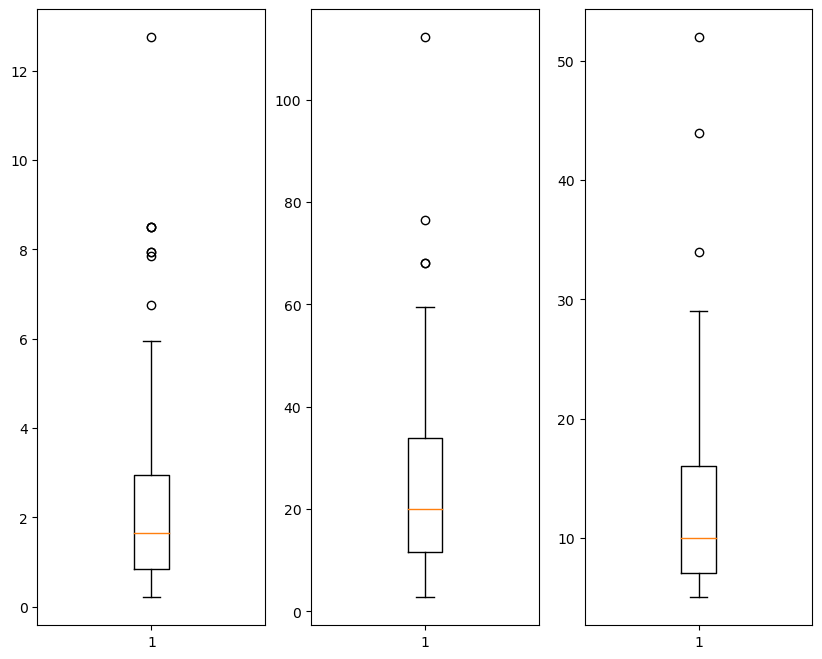

In [57]:
# pero esto también lo podemos hacer con un for loop 

fig, ax = plt.subplots(1, 3)

for i in range(len(columnas)):
    ax[i].boxplot(df[columnas[i]])
plt.show()

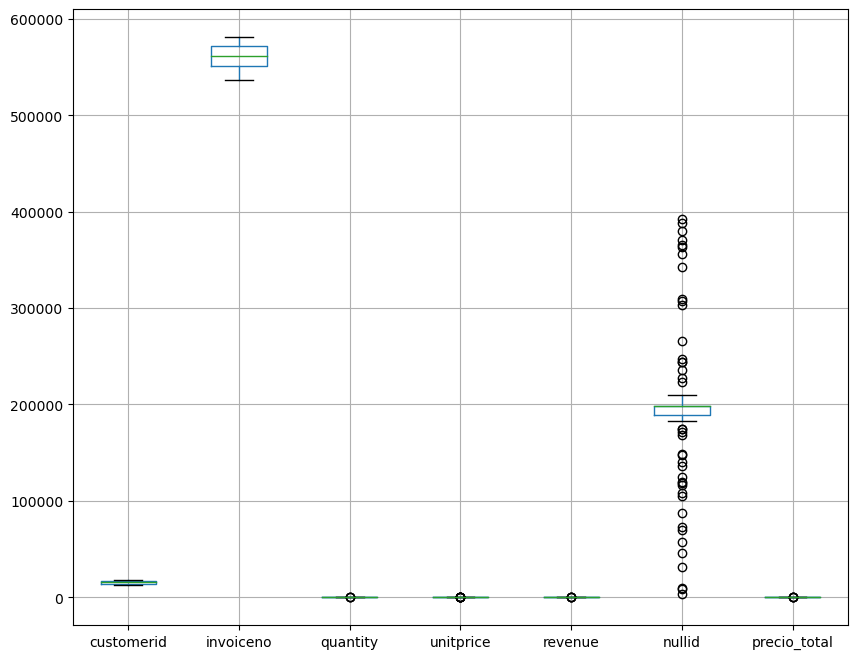

In [58]:
df.boxplot();

2️⃣ **`SEABORN`** --> método `sns.boxplot`

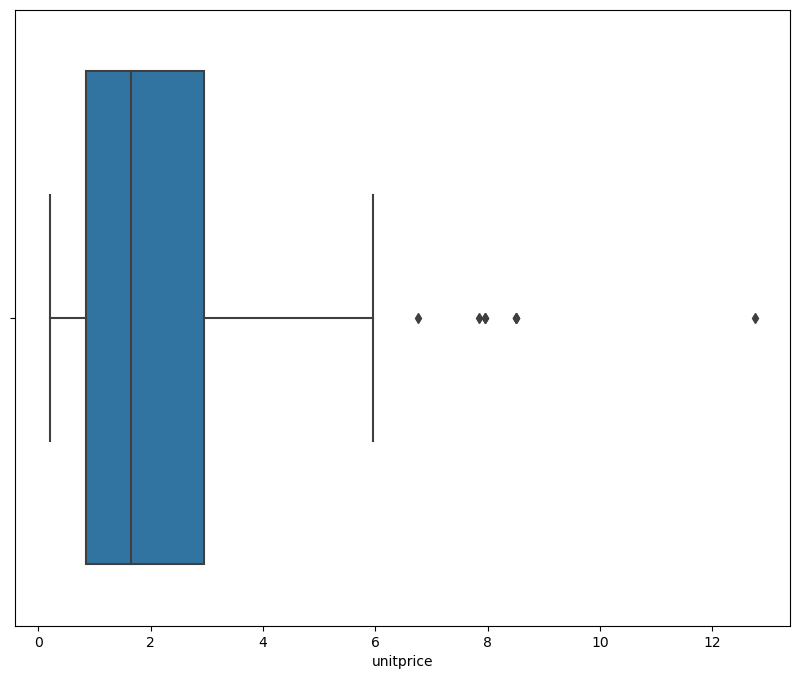

In [59]:
sns.boxplot(x="unitprice", data=df);

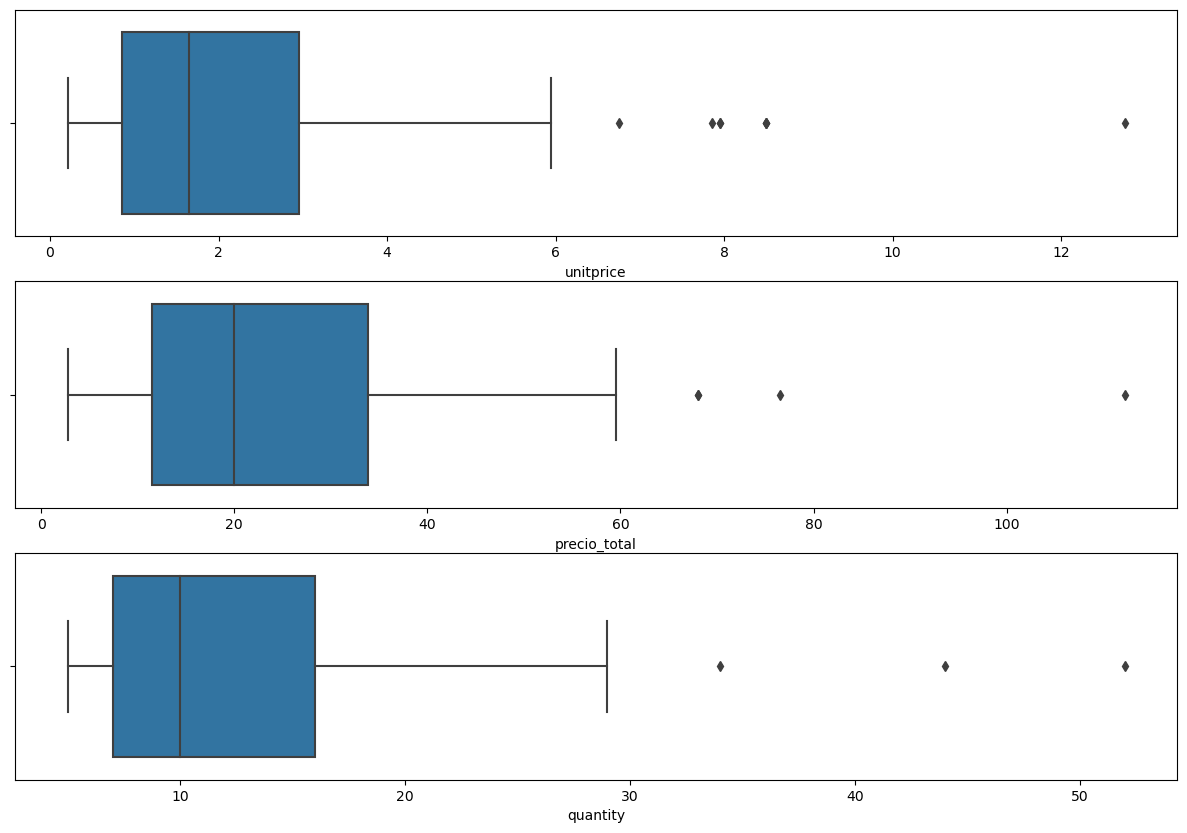

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i in range(len(columnas)):
    sns.boxplot(x=columnas[i], 
                data=df, 
                ax=ax[i])
plt.show()

3️⃣ **`PLOTLY`** --> método `px.box`

In [61]:
fig = px.box(df, y="unitprice")
fig.show()

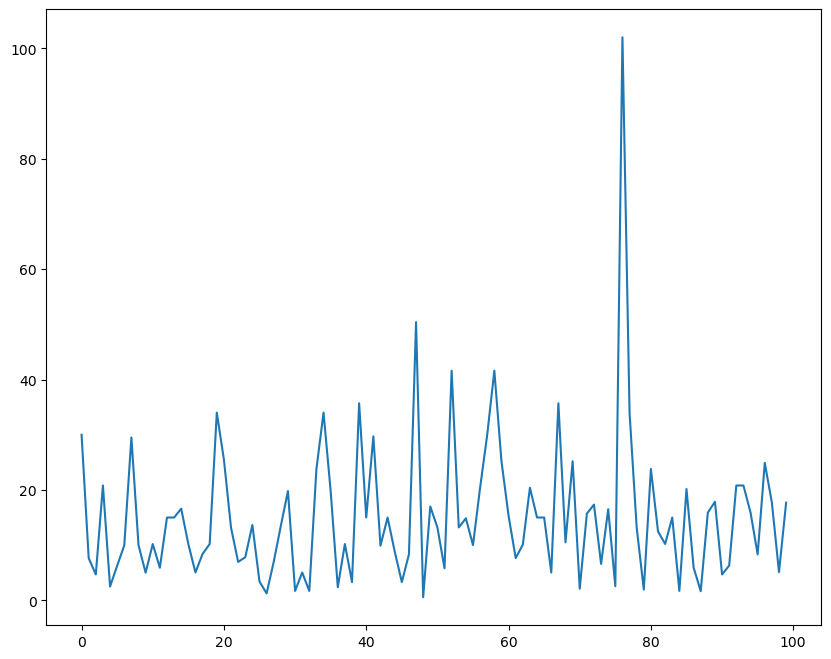

In [62]:
df.revenue.plot();

In [68]:
df.loc[75:80]

df[df.revenue>100]

customerid  invoiceno                 invoicedate stockcode  \
76       14251     579391  2011-11-29 12:07:00.000000     22910   

                          description  quantity  unitprice  revenue  \
76  PAPER CHAIN KIT VINTAGE CHRISTMAS        44       2.55    102.0   

           country    nullid      fecha               coordenadas  \
76  United Kingdom  198017.0 2011-11-29  (54.7023545, -3.2765753)   

    precio_total  
76         112.2

In [63]:
pd.options.plotting.backend = "plotly"

In [64]:
df.revenue.plot()

In [65]:
df.loc[76]

customerid                                  14251
invoiceno                                  579391
invoicedate            2011-11-29 12:07:00.000000
stockcode                                   22910
description     PAPER CHAIN KIT VINTAGE CHRISTMAS
quantity                                       44
unitprice                                    2.55
revenue                                     102.0
country                            United Kingdom
nullid                                   198017.0
fecha                         2011-11-29 00:00:00
coordenadas              (54.7023545, -3.2765753)
precio_total                                112.2
Name: 76, dtype: object

In [69]:
df[df.revenue<100].revenue.plot()

**DOCUMENTACIÓN INTERESANTE**

- [Colores en Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html9)


- [Colores en seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)


- [Colores en plotly](https://plotly.com/python/builtin-colorscales/) 


- [Tutorial matplotlib](https://matplotlib.org/stable/tutorials/index)


- [Tutorial seaborn](https://seaborn.pydata.org/tutorial.html)


- [Tutorial plotly](https://plotly.com/python/plotly-fundamentals/)